# TD Régression Linéaire

### BOUKRI Soukaina

## 1. Exploration du dataset

* Chargez le csv dans une dataframe pandas df

In [73]:
import pandas as pd
import statsmodels.formula.api as smf

df = pd.read_csv('C:/Users/Soukaina  BOUKRI/AppData/Local/RStudio-Desktop/notebooks/advertising.csv', sep = ',')
df.head()
#f.columns

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


* déterminer la distribution de chaque variable

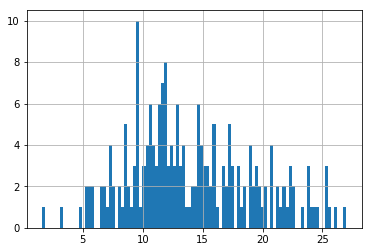

In [74]:
df['Sales'].hist(bins = 100)

L'allure du graphe montre que celui ci possede une distribution Binomiale ou poisson

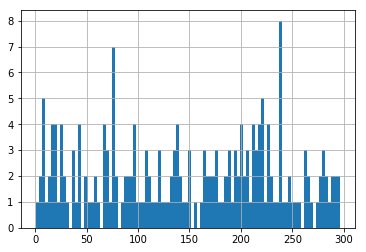

In [75]:
df['TV'].hist(bins = 100)

Si on prend en consideration la majorité des valeurs de la variable TV on remarque que cette derniere est plus ou moins uniform donc on peut la consideré comme etant une distribution UNIFORM

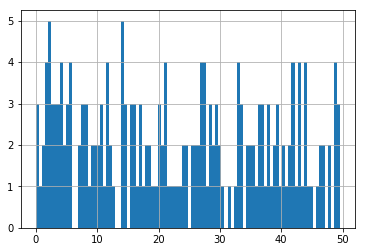

In [76]:
df['Radio'].hist(bins = 100)

Méme chose pour la variable RADIO la distribution est UNIFORM

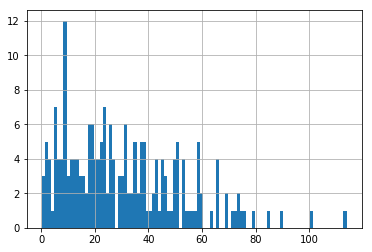

In [77]:
df['Newspaper'].hist(bins = 100)

La distribution de la variable Newspaper peut étre une distribution exponentielle , lognormal ou gamma pour pouvoir déterminer la loi exacte de la distribution il faut réaliser une étude à partir des hypothèses et ensuite comparer les résultats des tests.

* Y a t il des valeurs manquantes ou aberrantes (outliers)

In [78]:
print(df.isnull().values.any())
print(df.isnull().sum())

False
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


La fonction 'isnull().values.any()' a donné le résultat suivant: FALSE donc y a aucune valeur manquante dans notre data.

{'whiskers': [<matplotlib.lines.Line2D at 0x45ea59cc18>,
 'caps': [<matplotlib.lines.Line2D at 0x45ea5a4518>,
 'boxes': [<matplotlib.lines.Line2D at 0x45ea59cac8>],
 'medians': [<matplotlib.lines.Line2D at 0x45ea5a4d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x45ea5ab1d0>],
 'means': []}

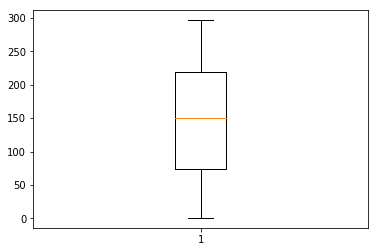

In [79]:
import matplotlib.pyplot as plt
plt.boxplot(df['TV'])

{'whiskers': [<matplotlib.lines.Line2D at 0x45ea5f2588>,
 'caps': [<matplotlib.lines.Line2D at 0x45ea5f2e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x45ea5f2438>],
 'medians': [<matplotlib.lines.Line2D at 0x45ea5fa6d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x45ea5fab00>],
 'means': []}

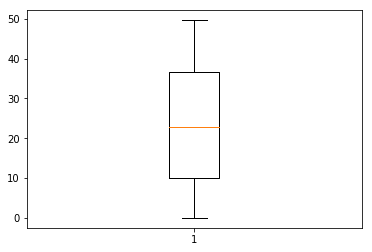

In [80]:
plt.boxplot(df['Radio'])

{'whiskers': [<matplotlib.lines.Line2D at 0x45ea6429e8>,
 'caps': [<matplotlib.lines.Line2D at 0x45ea64a2e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x45ea642898>],
 'medians': [<matplotlib.lines.Line2D at 0x45ea64ab38>],
 'fliers': [<matplotlib.lines.Line2D at 0x45ea64af60>],
 'means': []}

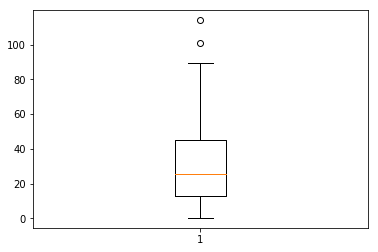

In [81]:
plt.boxplot(df['Newspaper'])

Les Boxplots montrent qu'il y a exactement deux valeurs aberrantes dans Newspaper qui dépassent la valeur de 100.

Pour nettoyer data il suffit de créer une deuxième data qui contient seulement les valeurs inférieur à 100.

In [82]:
df['Newspaper'].describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64

In [83]:
df[df['Newspaper'] > 100]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [84]:
df = df[df['Newspaper'] < 100]

{'whiskers': [<matplotlib.lines.Line2D at 0x45ea69a550>,
 'caps': [<matplotlib.lines.Line2D at 0x45ea69ae10>,
 'boxes': [<matplotlib.lines.Line2D at 0x45ea69a400>],
 'medians': [<matplotlib.lines.Line2D at 0x45ea6a36a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x45ea6a3ac8>],
 'means': []}

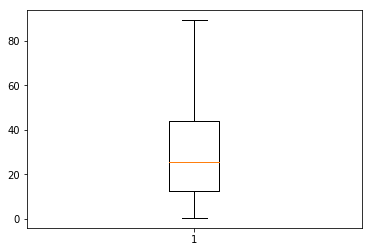

In [85]:
plt.boxplot(df['Newspaper'])

* la corrélation entre chacune des variables

In [86]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.779121
Radio,0.051978,1.000000,0.346364,0.576748
Newspaper,0.049771,0.346364,1.000000,0.219555
Sales,0.779121,0.576748,0.219555,1.000000


On remarque une corrélation entre Sales et TV.

* Faire un scatterplot de chaque couple de variable


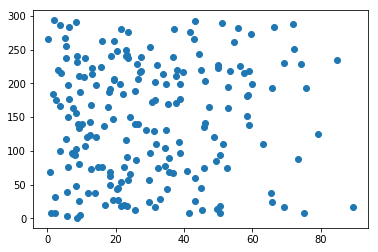

In [87]:
import plotly
import plotly.graph_objs as go
import plotly.plotly as py
import plotly.tools as tls
import plotly.figure_factory as ff
fig1 = dict(data=[df])

#py.iplot(df, filename='splom-iris1')

plt.scatter(df['Newspaper'] , df['TV'])
plt.show()

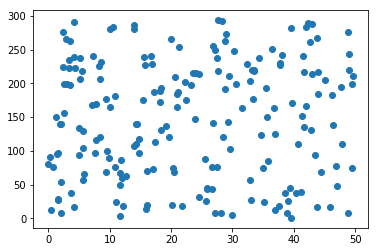

In [88]:
plt.scatter(df['Radio'] , df['TV'])
plt.show()

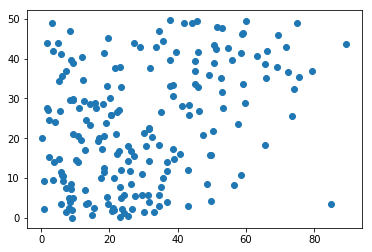

In [89]:
plt.scatter(df['Newspaper'] , df['Radio'])
plt.show()

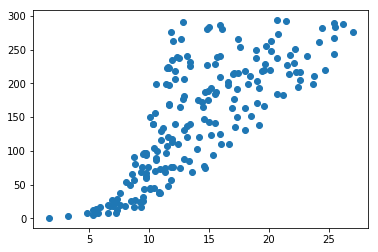

In [90]:
plt.scatter(df['Sales'] , df['TV'])
plt.show()

Le scotterplot vient renforcer le résultat de la fonction corr() les seules variables qui sont un peu liées sont Sales et TV.

## 2. Modeles univariables

In [91]:
lm1 = smf.ols(formula='Sales ~ TV', data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     302.8
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           1.29e-41
Time:                        16:31:35   Log-Likelihood:                -514.27
No. Observations:                 198   AIC:                             1033.
Df Residuals:                     196   BIC:                             1039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0306      0.462     15.219      0.000       6.120       7.942
TV             0.0474      0.003     17.400      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.551
Skew:                          -0.062   Prob(JB):                        0.759
Kurtosis:                       2.774   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
lm2 = smf.ols(formula='Sales ~ Radio', data=df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     97.69
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           5.99e-19
Time:                        16:31:36   Log-Likelihood:                -566.70
No. Observations:                 198   AIC:                             1137.
Df Residuals:                     196   BIC:                             1144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3166      0.560     16.622      0.000       8.211      10.422
Radio          0.2016      0.020      9.884      0.000       0.161       0.242
==============================================================================
Omnibus:                       20.193   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.115
Skew:                          -0.785   Prob(JB):                     9.56e-06
Kurtosis:                       3.582   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
lm3 = smf.ols(formula='Sales ~ Newspaper ', data=df).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     9.927
Date:                Wed, 26 Sep 2018   Prob (F-statistic):            0.00188
Time:                        16:31:36   Log-Likelihood:                -601.84
No. Observations:                 198   AIC:                             1208.
Df Residuals:                     196   BIC:                             1214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3193      0.639     19.274      0.000      11.059      13.580
Newspaper      0.0558      0.018      3.151      0.002       0.021       0.091
==============================================================================
Omnibus:                        5.835   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.303
Skew:                           0.333   Prob(JB):                       0.0706
Kurtosis:                       2.555   Cond. No.                         63.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
print(lm1.rsquared)
print(lm2.rsquared)
print(lm3.rsquared)
print(lm1.pvalues)
print(lm2.pvalues)
print(lm3.pvalues)
print(lm1.fitted_values)
print(lm2.fitted_values)
print(lm3.fitted_values)

0.6070293104334953
0.3326378903336834
0.04820425556917585
Intercept    4.834823e-35
TV           1.286886e-41
dtype: float64
Intercept    2.738220e-39
Radio        5.989743e-19
dtype: float64
Intercept    3.977102e-47
Newspaper    1.884492e-03
dtype: float64


AttributeError: 'OLSResults' object has no attribute 'fitted_values'

le meilleur modèle est TV avec l'équation: smf.ols(formula='Sales ~ TV', data=df).fit()
 
Le coefficient de la regression Sales ~ Radio est plus petit que le coefficient de la regression Sales ~ TV alors que TV est plus corrélé à Sales que Radio, On peut expliquer cela par le fait que deux variables soient « fortement corrélées » ne démontre pas qu'il y ait une relation de causalité entre l'une et l'autre. Le contre-exemple le plus typique est celui où elles sont en fait liées par une causalité commune.

## 3. modele multi variables

In [95]:
lm = smf.ols(formula='Sales ~ TV +Radio + Newspaper ', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           8.35e-95
Time:                        16:31:36   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.000       2.325       3.580
TV             0.0457      0.001     32.293      0.000       0.043       0.048
Radio          0.1886      0.009     21.772      0.000       0.171       0.206
Newspaper     -0.0012      0.006     -0.187      0.852      -0.014       0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         457.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4. modele multiplicatif

In [96]:
lm = smf.ols(formula='Sales ~ TV +Radio + Newspaper + TV*Radio ', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1446.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):          1.28e-142
Time:                        16:31:36   Log-Likelihood:                -266.88
No. Observations:                 198   AIC:                             543.8
Df Residuals:                     193   BIC:                             560.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7255      0.254     26.512      0.000       6.225       7.226
TV             0.0190      0.002     12.607      0.000       0.016       0.022
Radio          0.0264      0.009      2.877      0.004       0.008       0.044
Newspaper      0.0021      0.004      0.599      0.550      -0.005       0.009
TV:Radio       0.0011   5.28e-05     20.789      0.000       0.001       0.001
==============================================================================
Omnibus:                      123.366   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1069.191
Skew:                          -2.258   Prob(JB):                    6.73e-233
Kurtosis:                      13.450   Cond. No.                     1.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""